## PyBIDS tutorial

Based on the [original PyBIDS tutorial](https://bids-standard.github.io/pybids/examples/pybids_tutorial.html)

Using [ds004107](https://openneuro.org/datasets/ds004107) from OpenNeuro.  

Here is the abstract from the [original publication](https://www.sciencedirect.com/science/article/pii/S0531513107000623):

> Pooling of magnetoencephalography (MEG) data across laboratories is non-trivial because of differences in hardware, software, and environmental noise levels. To investigate these issues, we conducted a study with the same five subjects at three sites with different MEG arrays: Elekta-Neuromag Vectorview (Boston), VSM MedTech Omega 275 (Albuquerque), and 4D Neuroimaging Magnes 3600 WH (Minneapolis). Subjects were run in a simple somatosensory paradigm. Phantom data were also taken at each site. We developed software to allow comparisons of test/retest reliability across subjects, machines, and analysis methods. Preliminary analyses showed excellent test/retest results within subjects across instruments. Analysis of phantom data showed a localization error of less than 2 mm across multiple software packages. Our results show that (1) instruments from different manufacturers yield similar results for somatosensory data, and that (2) multiple software packages produce very accurate results for simple source configurations.

### Installing the dataset

If you wish to run this code locally, you will need to download the ds004107 dataset from OpenNeuro.  This will require about 77GB of free space on your disk.  Here are the steps:

1. Install the OpenNeuro command line interface (CLI) following the directions [here](https://www.npmjs.com/package/@openneuro/cli)

2. Download the dataset using the following command (from within the directory where you want it to be installed):

```openneuro download --draft ds004107 ds004107-download/```

3. Change the `bids_dir` variable below to point to this location on your machine.

You will also need to install the PyBIDS and MNE-Python packages to run the code locally (this is assuming you have a working scientific python installation):

```pip install -U mne bids```

#### Using PyBIDS

First import the necessary libraries

In [1]:
import bids
import mne
import numpy as np
from collections import Counter


Load the BIDS directory using the `bids.BIDSLayout()` function. 

In [2]:
bids_dir = '/Users/poldrack/data_unsynced/ds004107-download'
layout = bids.BIDSLayout(bids_dir)

In [3]:
layout

BIDS Layout: ...ata_unsynced/ds004107-download | Subjects: 9 | Sessions: 29 | Runs: 0

The resulting object has functions that allow one to get various details, such as a list of subjects:

In [4]:
layout.get_subjects()

['emptyroom',
 'mind002',
 'mind003',
 'mind004',
 'mind006',
 'mind007',
 'mind008',
 'mind009',
 'mind010']

or a list of tasks:

In [5]:
layout.get_tasks()

['noise', 'auditory', 'index', 'median', 'rest', 'visual']

Get an overview of all of the files

In [6]:
all_files = layout.get()
print("There are {} files in the layout.".format(len(all_files)))
print("\nThe first 10 files are:")
all_files[:10]

There are 397 files in the layout.

The first 10 files are:


[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/CHANGES'>,
 <BIDSJSONFile filename='/Users/poldrack/data_unsynced/ds004107-download/dataset_description.json'>,
 <BIDSJSONFile filename='/Users/poldrack/data_unsynced/ds004107-download/participants.json'>,
 <BIDSDataFile filename='/Users/poldrack/data_unsynced/ds004107-download/participants.tsv'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/README'>,
 <BIDSDataFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_channels.tsv'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.fif'>,
 <BIDSJSONFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.json'>,
 <BIDSDataFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-1

Each item is a BIDSFile object, but we can also get the filenames directly:

In [7]:
layout.get(return_type='filename')[:10]

['/Users/poldrack/data_unsynced/ds004107-download/CHANGES',
 '/Users/poldrack/data_unsynced/ds004107-download/dataset_description.json',
 '/Users/poldrack/data_unsynced/ds004107-download/participants.json',
 '/Users/poldrack/data_unsynced/ds004107-download/participants.tsv',
 '/Users/poldrack/data_unsynced/ds004107-download/README',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_channels.tsv',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.json',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/sub-emptyroom_ses-19121026_scans.tsv',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121027/meg/sub-emptyroom_ses-19121027_task-noise_channels.tsv']

### Filtering files by entities

Say we want to retrieve filenames of all BOLD runs for subject 01

In [8]:
layout.get(subject='mind002', extension='fif', suffix='meg', return_type='filename')



['/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-index_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-median_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-rest_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-index_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-median_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses


If you're wondering what entities you can pass in as filtering arguments, the answer is contained in the `.json` configuration files [housed here](https://github.com/bids-standard/pybids/tree/master/bids/layout/config). To save you the trouble, here are a few of the most common entities:

* `suffix`: The part of a BIDS filename just before the extension (e.g., `'bold'`, `'events'`, `'physio'`, etc.).
* `subject`: The subject label
* `session`: The session label
* `run`: The run index
* `task`: The task name

You can also use a list instead of a single value:

In [9]:
# get all subjects starting with "mind"
mind_subjects = [i for i in layout.get_subjects() if 'mind' in i]

# get auditory and visual tasks
layout.get(subject=mind_subjects, task=['visual', 'auditory'], 
           extension='fif', suffix='meg', return_type='filename')


['/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-01/meg/sub-mind003_ses-01_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-01/meg/sub-mind003_ses-01_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-02/meg/sub-mind003_ses-02_task-auditory_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-02/meg/sub-mind003_ses-02_task-visual_meg.fif',
 '/Users/poldrack/data_unsynced/ds004107-download/sub-mind004/ses-01/meg/sub-min

### Filtering by metadata
All of the entities listed above are found in the names of BIDS files. But sometimes we want to search for files based not just on their names, but also based on metadata defined (per the BIDS spec) in JSON files. Fortunately for us, when we initialize a `BIDSLayout`, all metadata files associated with BIDS files are automatically indexed. This means we can pass any key that occurs in any JSON file in our project as an argument to `.get()`. We can combine these with any number of core BIDS entities (like `subject`, `run`, etc.).

For example, say we want to retrieve all files where (a) the value of `Manufacturer` (a metadata key) is `Elekta`, (b) the task name is `'auditory'`, and (c) the subject starts with `mind`. Here's how we can do that:


In [10]:
layout.get(subject=mind_subjects, Manufacturer='Elekta', task='auditory')

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-02/meg/sub-mind002_ses-02_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-01/meg/sub-mind003_ses-01_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-02/meg/sub-mind003_ses-02_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind004/ses-01/meg/sub-mind004_ses-01_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind004/ses-02/meg/sub-mind004_ses-02_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind006/ses-01/meg/sub-mind006_ses-01_task-auditory_meg.fif'>,
 <BIDSFile filename='/Users/poldrack/data_unsync


### Other `return_type` values
While we'll typically want to work with either `BIDSFile` objects or filenames, we can also ask `get()` to return unique values (or ids) of particular entities. For example, say we want to know which subjects have at least one `T1w` file. We can request that information by setting `return_type='id'`. When using this option, we also need to specify a target entity (or metadata keyword) called `target`. This combination tells the `BIDSLayout` to return the unique values for the specified `target` entity. For example, in the next example, we ask for all of the unique subject IDs that have at least one file with a `T1w` suffix:



In [11]:
# Ask get() to return the ids of subjects that have T1w files
layout.get(return_type='id', target='subject', suffix='T1w')

['mind002',
 'mind003',
 'mind004',
 'mind006',
 'mind007',
 'mind008',
 'mind009',
 'mind010']

## The `BIDSFile`
When you call `.get()` on a `BIDSLayout`, the default returned values are objects of class `BIDSFile`. A `BIDSFile` is a lightweight container for individual files in a BIDS dataset. It provides easy access to a variety of useful attributes and methods. Let's take a closer look. First, let's pick a random file from our existing `layout`.





In [12]:
# Pick the 6th file in the dataset
bf = layout.get()[6]

# Print it
bf

<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.fif'>


Here are some of the attributes and methods available to us in a `BIDSFile` (note that some of these are only available for certain subclasses of `BIDSFile`; e.g., you can't call `get_image()` on a `BIDSFile` that doesn't correspond to an image file!):
* `.path`: The full path of the associated file
* `.filename`: The associated file's filename (without directory)
* `.dirname`: The directory containing the file
* `.get_entities()`: Returns information about entities associated with this `BIDSFile` (optionally including metadata)
* `.get_image()`: Returns the file contents as a nibabel image (only works for image files)
* `.get_df()`: Get file contents as a pandas DataFrame (only works for TSV files)
* `.get_metadata()`: Returns a dictionary of all metadata found in associated JSON files
* `.get_associations()`: Returns a list of all files associated with this one in some way

Let's see some of these in action.  First, let's Print all the entities associated with this file, and their values




In [13]:
bf.get_entities()

{'datatype': 'meg',
 'extension': '.fif',
 'session': '19121026',
 'subject': 'emptyroom',
 'suffix': 'meg',
 'task': 'noise'}

Print all the metadata associated with this file


In [14]:
bf.get_metadata()

{'ContinuousHeadLocalization': False,
 'DewarPosition': 'n/a',
 'DigitizedHeadPoints': True,
 'DigitizedLandmarks': True,
 'ECGChannelCount': 0,
 'EEGChannelCount': 0,
 'EMGChannelCount': 0,
 'EOGChannelCount': 2,
 'HeadCoilFrequency': [],
 'MEGChannelCount': 306,
 'MEGREFChannelCount': 0,
 'Manufacturer': 'Elekta',
 'MiscChannelCount': 0,
 'PowerLineFrequency': 60.0,
 'RecordingDuration': 309.7570297537584,
 'RecordingType': 'continuous',
 'SamplingFrequency': 1792.8858642578125,
 'SoftwareFilters': {'SpatialCompensation': {'GradientOrder': 0}},
 'TaskName': 'noise',
 'TriggerChannelCount': 9}

We can the union of both of the above in one shot like this


In [15]:
bf.get_entities(metadata='all')

{'ContinuousHeadLocalization': False,
 'DewarPosition': 'n/a',
 'DigitizedHeadPoints': True,
 'DigitizedLandmarks': True,
 'ECGChannelCount': 0,
 'EEGChannelCount': 0,
 'EMGChannelCount': 0,
 'EOGChannelCount': 2,
 'HeadCoilFrequency': [],
 'MEGChannelCount': 306,
 'MEGREFChannelCount': 0,
 'Manufacturer': 'Elekta',
 'MiscChannelCount': 0,
 'PowerLineFrequency': 60.0,
 'RecordingDuration': 309.7570297537584,
 'RecordingType': 'continuous',
 'SamplingFrequency': 1792.8858642578125,
 'SoftwareFilters': {'SpatialCompensation': {'GradientOrder': 0}},
 'TaskName': 'noise',
 'TriggerChannelCount': 9,
 'datatype': 'meg',
 'extension': '.fif',
 'session': '19121026',
 'subject': 'emptyroom',
 'suffix': 'meg',
 'task': 'noise'}

Here are all the files associated with our target file in some way. Notice how we get back both the JSON sidecar for our target file.


In [16]:
associated_files = bf.get_associations()
associated_files

[<BIDSJSONFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-emptyroom/ses-19121026/meg/sub-emptyroom_ses-19121026_task-noise_meg.json'>]

## Using PyBIDS for an analysis

Let's say that we want to create a plot showing the response to electrical stimulation to the left and right index finger for each subject.

First we will set up functions to complete each part of the analysis process, and then we will combine them to get the maps for each subject.

First we create a class with all of the functions to read, analyze, and plot the data.

In [17]:
class MEGAnalysis:
    def __init__(self, bids_dir, task, subject, ses='01',
                 filter=True, verbose=False):
        """ 
        
        Parameters
        ----------
        bids_dir : str
            Path to the root of the BIDS dataset
        task : str | None
            Task to load. If None, all tasks will be loaded.
        subject : str | list | None
            Subject(s) to load. If None, all subjects will be loaded.
        filter : bool
            If True, apply a bandpass filter to the data.
        verbose : bool
            If True, print out additional information.
        """

        self.layout = bids.BIDSLayout(bids_dir)

        assert isinstance(task, str), "task must be a string"
        assert task in self.layout.get_tasks(), "task not found in dataset"
        assert isinstance(subject, (str)), "subject must be a string"
        assert subject in self.layout.get_subjects(), "subject not found in dataset"
        assert isinstance(ses, str), "ses must be an string"
        assert ses in self.layout.get_sessions(), "session not found in dataset"

        self.subject = subject
        self.session = ses
        self.task = task
        self.filter = filter
        self.verbose = verbose

        self.raw = None
        self.events_df = None
        self.event_dict = None
        self.events = None
        self.stim_channel = None
        self.evoked = None
    
    def load_raw(self):
        if self.verbose:
            print("Loading data for subject {} and task {}".format(self.subject, self.task))
        raw_fname = layout.get(subject=self.subject, task=self.task, session=self.session, extension='fif', suffix='meg')
        print(raw_fname)
        assert len(raw_fname) == 1, "More or less than than one file found for subject {} and task {}".format(self.subject, self.task)
        self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)
        if self.filter:
            self.raw.filter(1, 25, verbose=self.verbose)
    
    def load_events(self):
        events_file = layout.get(subject=self.subject, task=self.task, session=self.session, extension='tsv', suffix='events')[0]
        self.events_df = events_file.get_df()

    def get_event_dict(self):
        self.event_dict = {}
        trial_types = self.events_df['trial_type'].unique()
        for i, trial_type in enumerate(trial_types):
            self.event_dict[trial_type] = self.events_df.query(f'trial_type == "{trial_type}"')['value'].values[0]

    def get_events_trigger(self):
        # last trigger has all events
        chnames = [i for i in self.raw.ch_names if i.find('STI') != -1]
        for chname in chnames:
            e = mne.find_events(self.raw, stim_channel=chname, min_duration=0.001, verbose=0)
            if len(e) == 0:
                continue
            n_types = len(np.unique(e[:, 2]))
            if n_types > 1:
                self.events = e
                self.stim_channel = chname

    def get_evoked(self, tmin=-0.3, tmax=0.7):
        epochs = mne.Epochs(self.raw, self.events, event_id=self.event_dict, preload=True, verbose=self.verbose)
        self.evoked = {key:epochs[key].average() for key in epochs.event_id.keys()}

    def plot_evoked(self, condition):
        assert condition in self.evoked.keys(), f"Condition {condition} not found in evoked data"
        self.evoked[condition].plot()
    
    def plot_topomap(self, condition, tmin=0.1, tmax=0.2, ntp=5, average_window=None):
        assert condition in self.evoked.keys(), f"Condition {condition} not found in evoked data"
        self.evoked[condition].plot_topomap(times=np.linspace(tmin, tmax, ntp), average=average_window)


In [18]:
analysis = MEGAnalysis(bids_dir, 'index', 'mind002')
load_output = analysis.load_raw()


[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


In [19]:
# load events.tsv file
analysis.load_events()

analysis.events_df.head()


,onset,duration,trial_type,value,sample
0,6.800768,0.0,right,65,12193
1,8.400423,0.0,left,130,15061
2,10.000637,0.0,right,65,17930
3,11.500453,0.0,right,65,20619
4,13.000270,0.0,right,65,23308


In [20]:
# get event type dict
analysis.get_event_dict()
analysis.event_dict

{'right': 65, 'left': 130}

In [21]:
analysis.get_events_trigger()
print(f'found {len(analysis.events)} events on channel {analysis.stim_channel}')
print(Counter(analysis.events[:, 2]))

found 631 events on channel STI 014
Counter({65: 324, 130: 307})


In [22]:
analysis.get_evoked()
analysis.evoked

{'right': <Evoked | 'right' (average, N=324), -0.20024 – 0.49975 s, baseline -0.200236 – 0 s, 306 ch, ~11.6 MB>,
 'left': <Evoked | 'left' (average, N=307), -0.20024 – 0.49975 s, baseline -0.200236 – 0 s, 306 ch, ~11.6 MB>}

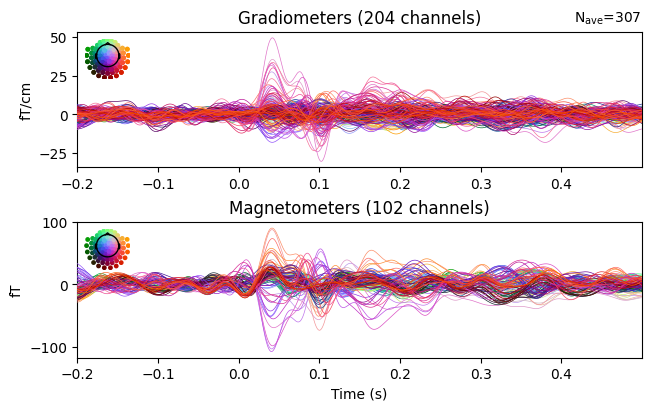

In [23]:
analysis.plot_evoked('left')

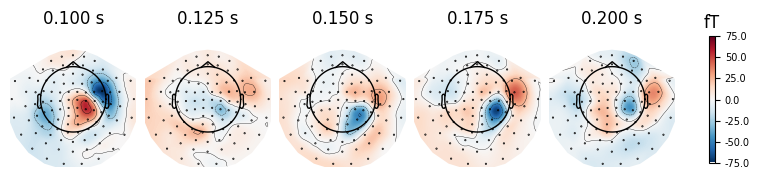

In [24]:
analysis.plot_topomap('left')

### Plot topo maps for all subjects

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


plotting for subject mind002
left hemisphere


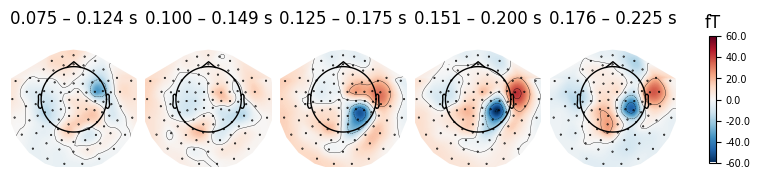

right hemisphere


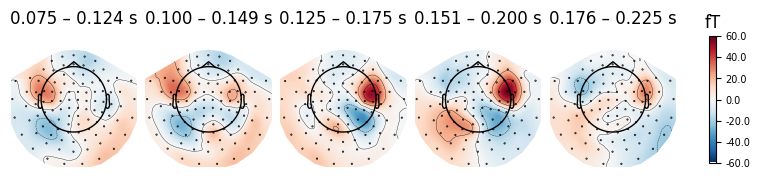

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-01/meg/sub-mind003_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind003/ses-01/meg/sub-mind003_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


plotting for subject mind003
left hemisphere


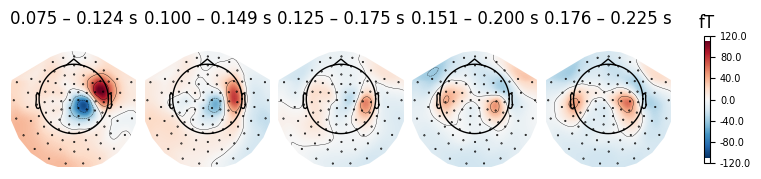

right hemisphere


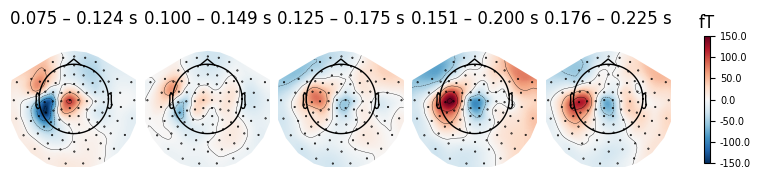

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind004/ses-01/meg/sub-mind004_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind004/ses-01/meg/sub-mind004_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


plotting for subject mind004
left hemisphere


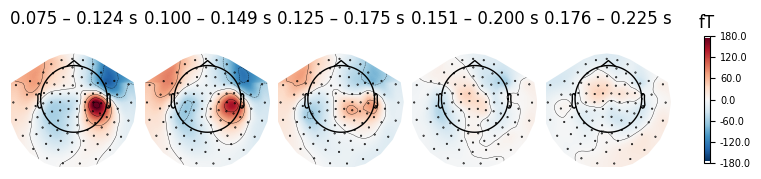

right hemisphere


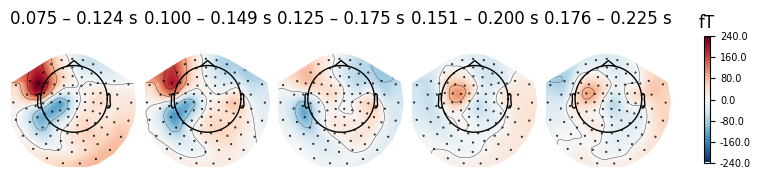

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind006/ses-01/meg/sub-mind006_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind006/ses-01/meg/sub-mind006_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


plotting for subject mind006
left hemisphere


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:84: RuntimeWarning: (X, Y) fit (2.7, 23.0) more than 20 mm from head frame origin
  self.evoked[condition].plot_topomap(times=np.linspace(tmin, tmax, ntp), average=average_window)


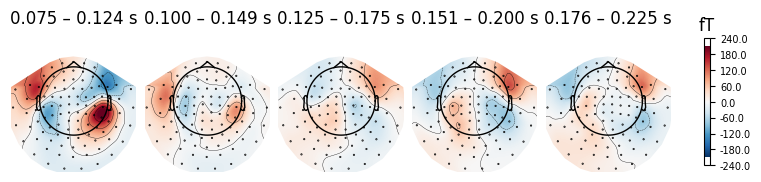

right hemisphere


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:84: RuntimeWarning: (X, Y) fit (2.7, 23.0) more than 20 mm from head frame origin
  self.evoked[condition].plot_topomap(times=np.linspace(tmin, tmax, ntp), average=average_window)


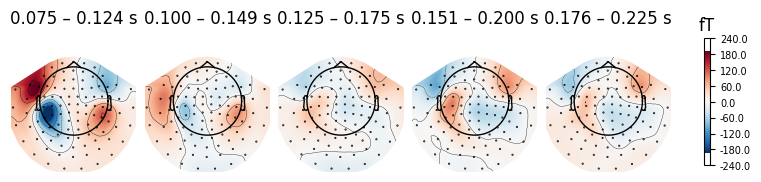

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind007/ses-01/meg/sub-mind007_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind007/ses-01/meg/sub-mind007_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


plotting for subject mind007
left hemisphere


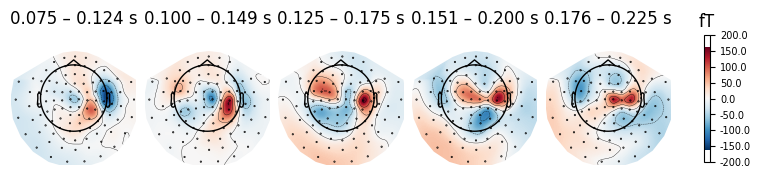

right hemisphere


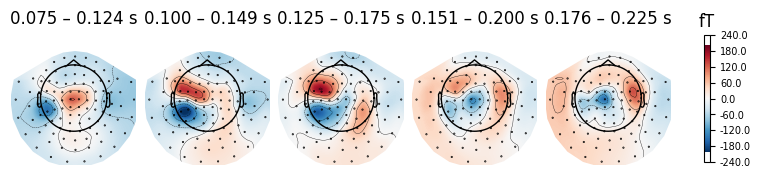

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind008/ses-01/meg/sub-mind008_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind008/ses-01/meg/sub-mind008_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


plotting for subject mind008
left hemisphere


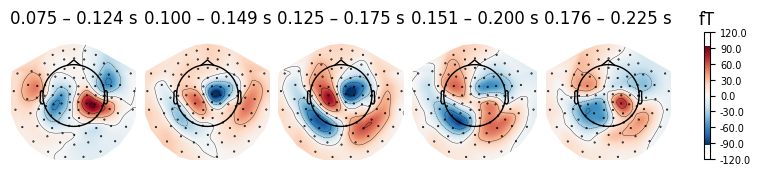

right hemisphere


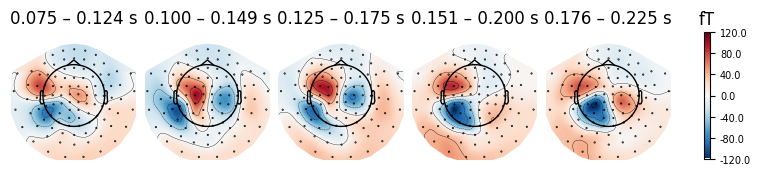

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind009/ses-01/meg/sub-mind009_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind009/ses-01/meg/sub-mind009_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


plotting for subject mind009
left hemisphere


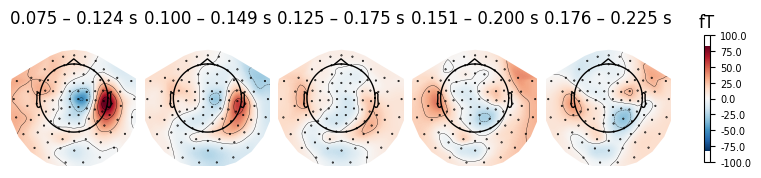

right hemisphere


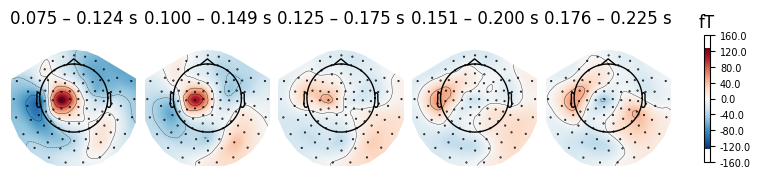

[<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind010/ses-01/meg/sub-mind010_ses-01_task-index_meg.fif'>]


/var/folders/r2/f85nyfr1785fj4257wkdj7480000gn/T/ipykernel_23928/1070741155.py:48: RuntimeWarning: This filename (<BIDSFile filename='/Users/poldrack/data_unsynced/ds004107-download/sub-mind010/ses-01/meg/sub-mind010_ses-01_task-index_meg.fif'>) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.raw = mne.io.read_raw_fif(raw_fname[0], preload=True, verbose=self.verbose)


plotting for subject mind010
left hemisphere


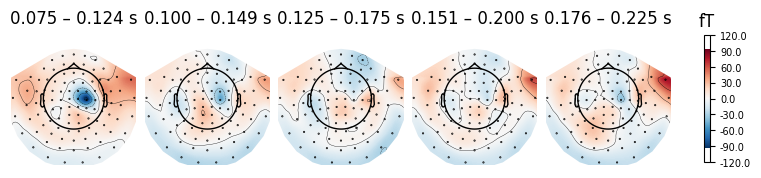

right hemisphere


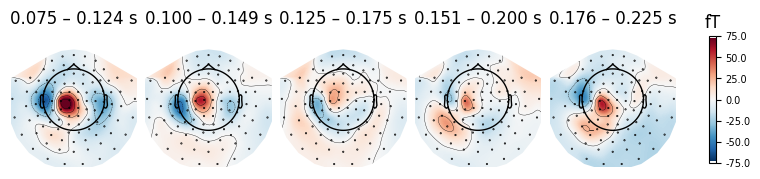

In [25]:
bids_dir = '/Users/poldrack/data_unsynced/ds004107-download'
layout = bids.BIDSLayout(bids_dir)
mind_subjects = [i for i in layout.get_subjects() if 'mind' in i]
plot_times = np.linspace(0.0, 0.2, 5)
average_window = 0.05

for subject in mind_subjects:
    analysis = MEGAnalysis(bids_dir, 'index', subject)
    analysis.load_raw()
    analysis.load_events()
    analysis.get_event_dict()
    analysis.get_events_trigger()
    analysis.get_evoked()
    print(f'plotting for subject {subject}')
    print('left hemisphere')
    analysis.plot_topomap('left', tmin=0.1, tmax=0.2, ntp=5, average_window=average_window)
    print('right hemisphere')
    analysis.plot_topomap('right', tmin=0.1, tmax=0.2, ntp=5, average_window=average_window)
